Now that we have the data in one place we'll start building some visulaization to see what we have

First we'll bring in the modules we'll need:

In [9]:
import sqlite3                     #Bring in Sqlite for the database

from os import listdir             #Bring in OS to read all the files
from os.path import isfile, join  

import pandas as pd                #Bring in Pandas to work wiht the data
import matplotlib.pyplot as plt    #Bring in matplotlib to run visualizations
import matplotlib.dates as mdates
import numpy as np                 #Bring in numpy for math operations

import time
from datetime import date
from datetime import datetime

Next we'll bring in the data from the SQLite database.  Make sure the 'FracFocus_Database' script has been run successfully before moving to this part.

First we'll make a connection to the database

In [10]:
mypath = "C:/Users/BWeaver/Google Drive/FracFocus/FracFocus"  #make sure the use back slashes or double forward slashes '\\'
mypath = '/Users/brianweaver/Google Drive/FracFocus'
conn = sqlite3.connect(mypath + '/FracFocus.sqlite')
cur = conn.cursor()

Next we'll pull data from the database.  We'll use SQL to pull data from Wyoming and take the following columns:

JobStartDate, JobEndDate, APINumber, StateNumber, CountyNumber, OperatorName, WellName, Latitude, Longitude, Projection, TVD, TotalBaseWaterVolume, TotalBaseNonWaterVolume, StateName, CountyName.

This will help keep the data set smaller.  Wyoming's state numbers is 49 so we'll use that sort off of.

In [16]:
Wyoming_Data = pd.read_sql_query("""SELECT JobStartDate, JobEndDate, APINumber, StateNumber, CountyNumber, OperatorName, 
                      WellName, Latitude, Longitude, Projection, TVD, TotalBaseWaterVolume, 
                      TotalBaseNonWaterVolume, StateName, CountyName from registryupload
            WHERE     StateNumber = 49 """, conn)

Now we'll view the top 10 rows to see what we brought in

In [17]:
print('Number of rows:',Wyoming_Data.size, '\n')
Wyoming_Data.head(10)

Number of rows: 67770 



,JobStartDate,JobEndDate,APINumber,StateNumber,CountyNumber,OperatorName,WellName,Latitude,Longitude,Projection,TVD,TotalBaseWaterVolume,TotalBaseNonWaterVolume,StateName,CountyName
0,5/19/1982 12:00:00 AM,5/19/1982 12:00:00 AM,49009219470000,49,9,"Chesapeake Operating, Inc.",WILLIAM VALENTINE 1,42.97281,-105.95384,NAD27,None,None,None,WYOMING,CONVERSE
1,2/7/1995 12:00:00 AM,2/7/1995 12:00:00 AM,49009228850000,49,9,"Chesapeake Operating, Inc.",LIZARD HEAD 1-8H RE,42.85147,-105.41151,NAD27,None,None,None,WYOMING,CONVERSE
2,5/3/2010 12:00:00 AM,5/3/2010 12:00:00 AM,49035276890000,49,35,Encana Oil & Gas (USA) Inc.,Stud Horse Butte 48-17,42.48361,-109.735,NAD83,None,None,None,Wyoming,Sublette
3,5/3/2010 12:00:00 AM,5/3/2010 12:00:00 AM,49035276970000,49,35,Encana Oil & Gas (USA) Inc.,Stud Horse Butte 32-17,42.4872,-109.735159,NAD83,None,None,None,Wyoming,Sublette
4,11/6/2010 12:00:00 AM,11/6/2010 12:00:00 AM,49035275820000,49,35,Encana Oil & Gas (USA) Inc.,Stud Horse Butte 34-15,42.485249,-109.697883,NAD83,None,None,None,Wyoming,Sublette
5,11/6/2010 12:00:00 AM,11/6/2010 12:00:00 AM,49035275900000,49,35,Encana Oil & Gas (USA) Inc.,Stud Horse Butte 32-15,42.486907,-109.695888,NAD83,None,None,None,Wyoming,Sublette
6,11/9/2010 12:00:00 AM,11/9/2010 12:00:00 AM,49035266860000,49,35,Encana Oil & Gas (USA) Inc.,Stud Horse Butte 72-15,42.477975,-109.713099,NAD83,None,None,None,Wyoming,Sublette
7,11/9/2010 12:00:00 AM,11/9/2010 12:00:00 AM,49035275830000,49,35,Encana Oil & Gas (USA) Inc.,Stud Horse Butte 74-15,42.475923,-109.710996,NAD83,None,None,None,Wyoming,Sublette
8,11/17/2010 12:00:00 AM,11/17/2010 12:00:00 AM,49035250640000,49,35,Encana Oil & Gas (USA) Inc.,Jonah Federal 74-7,42.411649,-109.740428,NAD83,None,None,None,Wyoming,Sublette
9,11/17/2010 12:00:00 AM,11/17/2010 12:00:00 AM,49035267690000,49,35,Encana Oil & Gas (USA) Inc.,Stud Horse Butte 19-10,42.502936,-109.701106,NAD83,None,None,None,Wyoming,Sublette


Now that we have the data in a panda object let's make some changes to it.  First we need to get JobStartDate and JobEndDate data type fixed.  We'll convert that to a datetime object

In [18]:
Wyoming_Data['JobStartDate'] = pd.to_datetime(Wyoming_Data['JobStartDate'])
Wyoming_Data['JobEndDate'] = pd.to_datetime(Wyoming_Data['JobEndDate'])

Let's see what that looks like:

In [19]:
Wyoming_Data[['JobStartDate', 'JobEndDate', 'OperatorName' ]].head(10)

,JobStartDate,JobEndDate,OperatorName
0,1982-05-19,1982-05-19,"Chesapeake Operating, Inc."
1,1995-02-07,1995-02-07,"Chesapeake Operating, Inc."
2,2010-05-03,2010-05-03,Encana Oil & Gas (USA) Inc.
3,2010-05-03,2010-05-03,Encana Oil & Gas (USA) Inc.
4,2010-11-06,2010-11-06,Encana Oil & Gas (USA) Inc.
5,2010-11-06,2010-11-06,Encana Oil & Gas (USA) Inc.
6,2010-11-09,2010-11-09,Encana Oil & Gas (USA) Inc.
7,2010-11-09,2010-11-09,Encana Oil & Gas (USA) Inc.
8,2010-11-17,2010-11-17,Encana Oil & Gas (USA) Inc.
9,2010-11-17,2010-11-17,Encana Oil & Gas (USA) Inc.


Now that we have the dates corrected let's look at how many submissions we have over time

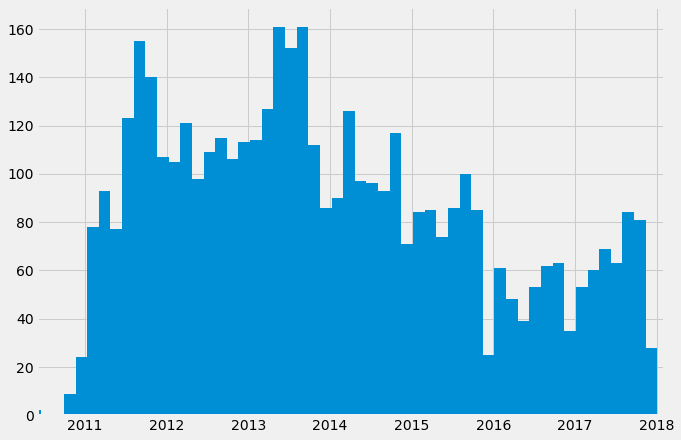

In [20]:
fig, ax = plt.subplots()                                    #Setup the plot
fig.set_size_inches(10, 7)                                  #Set the figure size
plt.style.use('fivethirtyeight')                            #Set the style, I'm a sucker for fivethirtyeight plots
min_x = datetime.strptime('2010-06-01','%Y-%m-%d').date()   #set the Min date on the x-axis 
max_x = datetime.strptime('2018-02-01','%Y-%m-%d').date()   #Set the Max date on the x-axis
ax.set_xlim(min_x, max_x)
ax.hist(Wyoming_Data['JobEndDate'].values, bins = 250)      #Set the Historgram paramaters
plt.show()

Now let's see how many by the top ten operator

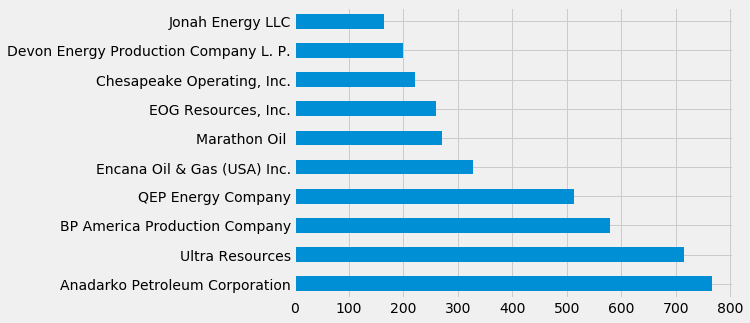

In [30]:
Wyoming_Data['OperatorName'].value_counts()[:10].plot(kind='barh', figsize = (7,5))
plt.show()

Now let's map the data with the Lat/Long that was given.  We'll use the basemap modelues.  It can be installed using this comand on the termial: conda install basemap

In [31]:
from mpl_toolkits.basemap import Basemap       #Import the Basemap module

Now we'll set up the map

https://gist.github.com/dannguyen/eb1c4e70565d8cb82d63
https://matplotlib.org/basemap/users/geography.html

***Not working yet***

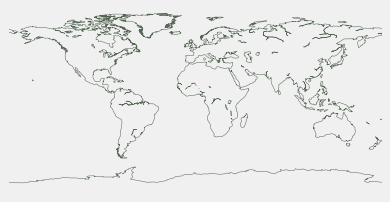

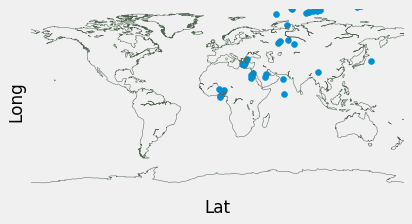

In [33]:
fig, ax = plt.subplots()
earth = Basemap(ax=ax)
earth.drawcoastlines(color='#556655', linewidth=0.5)
ax.scatter(Wyoming_Data['Longitude'], Wyoming_Data['Latitude'])
ax.set_xlabel("Lat")
ax.set_ylabel("Long")
plt.show()